## `PROBLEM STATEMENT`

The objective is to create a prediction model that can reliably anticipate real estate prices or property values based on a range of characteristics, including cost, house size in square footage, number of bathrooms, size and presence of a basement, number of floors and more. The objective is to support purchasers, vendors, and real estate agents in making knowledgeable choices about real estate transactions.
 
 
## `HYPOTHESIS GENERATION`

1. Square Footage Hypothesis: It is anticipated that there will be a strong positive link between the house's overall square footage and its value. Bigger living areas typically fetch greater costs since they are more attractive.
 
2. Bathroom Count Hypothesis: The number of bathrooms on a house is positively connected with its value. It is anticipated that homes with additional bathrooms will fetch higher prices since they are more useful, convenient, and appealing.
 
3. Floor Hypothesis: Because they may offer greater living space and possibly nicer views, properties with multiple levels may be worth more.
 
4. Condition Hypothesis: Higher values are anticipated for properties that are in better shape. A property that has been well-maintained is probably going to cost more money than one that needs extensive repairs or improvements.
 
5. Renovation Hypothesis: Properties that have undergone renovations are probably worth more than those that haven't. A property's value, charm, and usability can all be improved with renovations.
 
6. Basement Hypothesis: Property value is positively impacted by the existence of a basement. It is anticipated that larger basement spaces will increase the value of a home.
 
7. Year Built Hypothesis: Newer properties tend to have higher values compared to older ones due to modern amenities, construction quality, and desirability.

# Import Library

In [1]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
import matplotlib.ticker as mticker
%matplotlib inline

# For handling multiple files
from glob import glob

# for cat features
from category_encoders import OneHotEncoder

# For interactive dashboard
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

from sklearn.impute import SimpleImputer # Handling missing values
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline

# Disable the SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'


# Data Exploration

In [2]:
df = pd.read_csv("data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

We don't have any `null values`, so we dont need to remove any data


In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


The table above shows the summary statistics of the dataset. We can see our means and min and max values for each. 

We also see that some columns like the `price` and the `square_foot` columns have a `high Standard Deviation`, which tells us that our `features vary widely`

<Axes: >

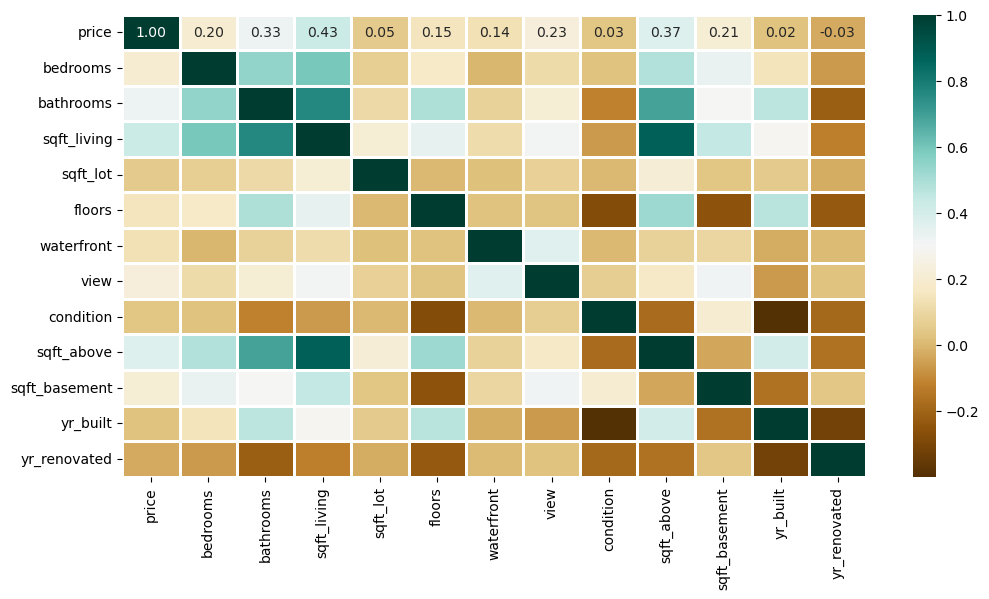

In [5]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

A `heatmap` is like a correlation matrix. It helps us see which features correlate with which.

In the above we firstly look at the `Price` column, we notice that there aren't many strongly correlated features. However we do see that `bathrooms` & `sqft_living` have some positive correlation, so it will be interesting to see how they play out.

Looking at the data as a whole we see some interesting points:
- `sqft_living` & `sqft_above`, have a `high positive correlation`, which makes sense, as you would expect that the bigger the living space, the higher the "above" section would be comapred to the "basement". We can see this is true by the `slight positive correlation` with `sqft_basement`
- We also see `condition` & `yr_built` have a `negative correlation`, showing that older houses have a worse condition which makes sense
- `waterfront` and `view` have a positive correlation

#### So we have some good information, but not all of these points will help us predict house prices

Text(0.5, 1.0, 'Price vs sqft_living')

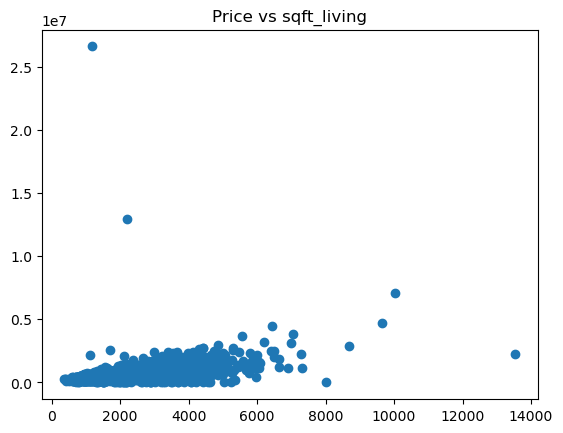

In [6]:
plt.scatter(df.sqft_living, df.price)
plt.title("Price vs sqft_living")

We can see that `price` starts `increasing as the sqft increases`

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

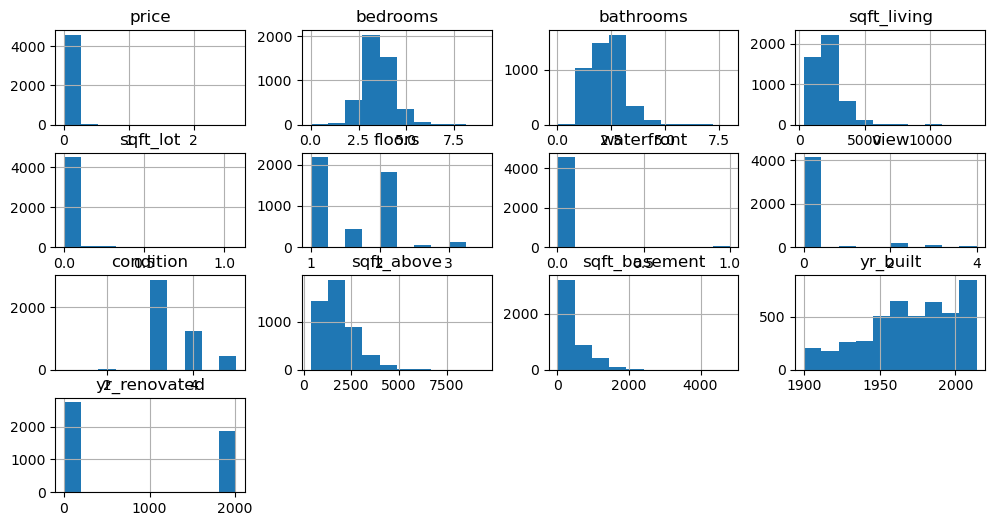

In [7]:
df.hist(figsize=(12,6))

Histograms help us understand the distribution of data a lot better. It is interesting to note how the data looks:
- `bedrooms` seems to be the only feature with a normal bell curve
- All the `sqft_` graphs seem to be skewed left

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

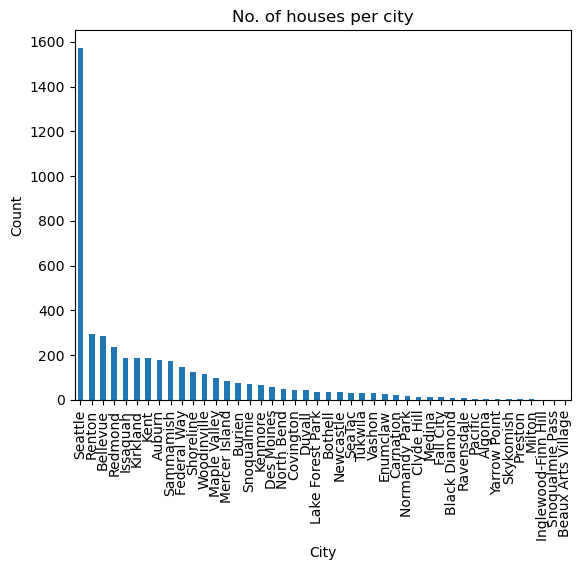

In [8]:
df["city"].value_counts().plot(kind='bar')
plt.title("No. of houses per city")
plt.xlabel("City")
plt.ylabel("Count")
sns.despine

In the diagram above we can see that `Seattle` has the most amount of houses by far. But will this mean they have the `highest average price`?

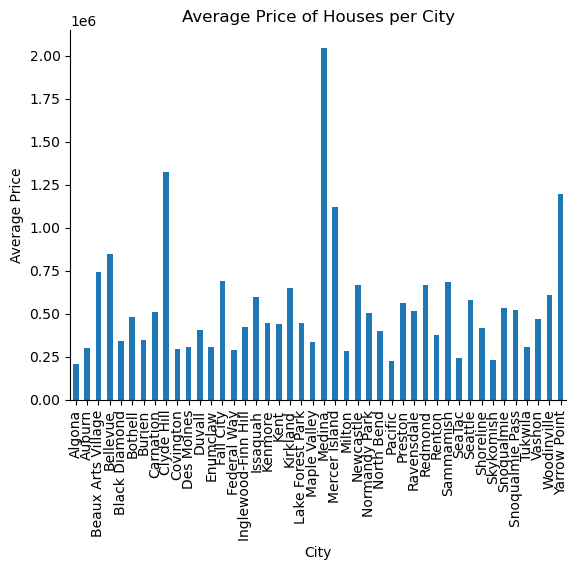

In [9]:
df.groupby("city")["price"].mean().plot(kind='bar')
plt.title("Average Price of Houses per City")
plt.xlabel("City")
plt.ylabel("Average Price")
sns.despine()

We can see that although `Seattle` has the highest count it is on the `lower side` in terms of `ave_price`. This could indicate `Seattle` is a densely populated area due to having cheaper housing, but also has oppurtunities.

### We now have a better understanding of our data, we can proceed with Preparation

# Data Preparation

Off the bat, there are some basic changes we can make:

- `date` needs to be changed to `datetime`
- We also saw in the beginning that there was data in the dataset in the `price` column that was `0`.
This means that there are outliers, so we can get rid of them

### Check for cardinality

- cardinality is a measure of the uniqueness of data in a column
- So it is important to remove features with very high, or low cardinality.
- We can check that with some code


In [10]:
cardinality = df.select_dtypes("object").nunique()
cardinality

date          70
street      4525
city          44
statezip      77
country        1
dtype: int64

We have `5 object columns`
- `date` will not help us in prediction, as it is not a date of any relevant time in the houses' lifespan
- `street` has a lot of unique data, so it can be dropped
- `country` is 1, so it goes. And we want to use `city` in our prediction, so `statezip` can also go

### Feature Engineering

It can be very useful to create more features by using other features:

- ratio of bathrooms and bedrooms
- price per sqft
- bathroom & bedroom interactions (multiplication)

We going to create a `function` that will help summarise all our preperation into 1 block of code

In [11]:
def data_prepared():
    # Read the CSV file into a DataFrame
    df = pd.read_csv("data.csv")
   
    # Convert 'date' column to datetime
    df['date'] = pd.to_datetime(df['date'])  
   
    # Filter out outliers in the 'price' column
    df = df[(df['price'] >= df['price'].quantile(0.1)) & (df['price'] <= df['price'].quantile(0.9))]
   
    # Feature Engineering: Calculate the ratio of Bedrooms to Bathrooms
    df['bedrooms_to_bathrooms_ratio'] = df['bedrooms'] / df['bathrooms']
     
    # Feature Engineering: Calculate Price per Square Foot
    df['price_per_sqft'] = df['price'] / df['sqft_living']
   
    # Feature Engineering: Create Interaction Features (e.g., 'bedrooms' * 'bathrooms')
    df['bedrooms_bathrooms_interaction'] = df['bedrooms'] * df['bathrooms']
 
    # Drop 'country' and 'statezip' columns
    df = df.drop(columns=["country", "statezip"])
 
    # Drop additional features not needed for analysis
    df = df.drop(columns=['sqft_above', 'sqft_basement', 'yr_renovated', 'condition', 'yr_built','date','street','city','sqft_lot'])
 
    return df

<Axes: >

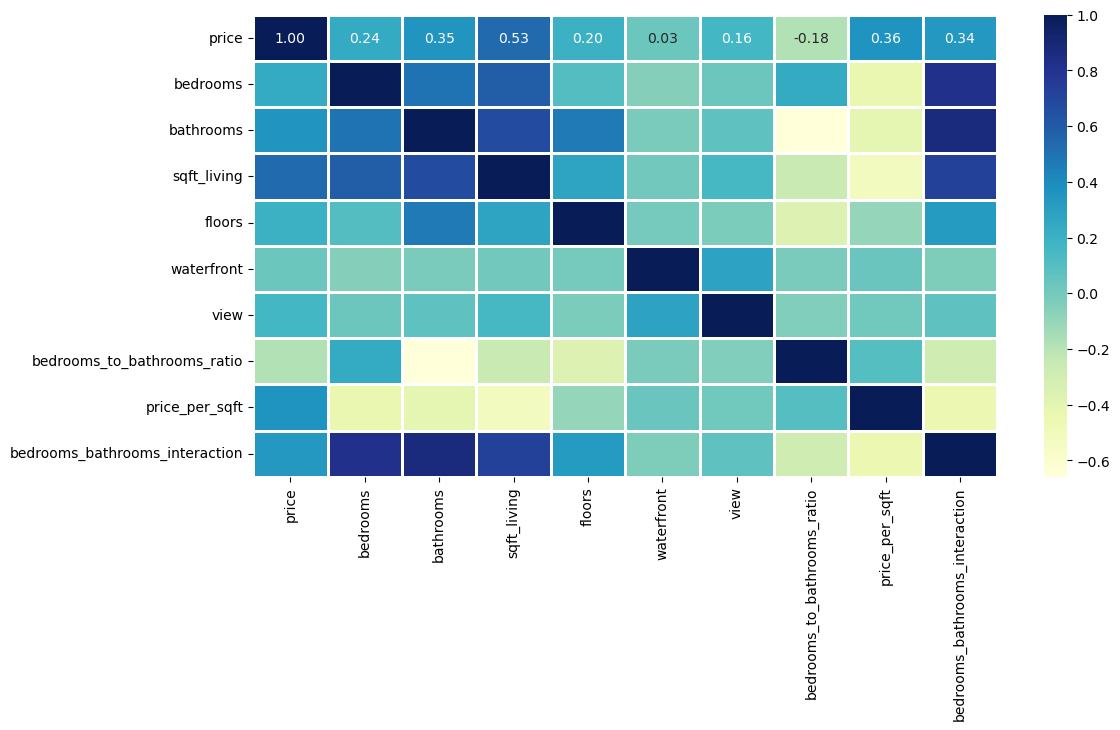

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(data_prepared().corr(numeric_only=True),
            cmap = 'YlGnBu',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

After running our `method` we can observe some of the changes above:

- `sqft_living & price_per_sqft` is still our highest correlating variables with `price`
- All the new features, have `high correlation` with `bathroom & bedroom`. Which is to be expected

# Modelling

### We will first of start with `Random Forest Reggresion`

In [13]:
from sklearn.model_selection import train_test_split

X = data_prepared().drop(columns=['price'])  # Features
y = data_prepared()['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest Regressor
rf_reg.fit(X_train, y_train)

# Evaluate the model
rf_score = rf_reg.score(X_test, y_test)
print("Random Forest Regressor Score:", rf_score)


Random Forest Regressor Score: 0.9968912589028635


A score of `99%` seems very good

In [15]:
rf = make_pipeline(

    # Imputation
    SimpleImputer(),

    # build model
    RandomForestRegressor(
        random_state=42)
    )

# fit the model
rf.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [16]:
# Predict the train data
y_pred_training = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Compute MAE
print(f"Training MAE:${round(mean_absolute_error(y_train, y_pred_training),2)}")
print(f"Test data MAE:${round(mean_absolute_error(y_test, y_pred_test),2)}")

Training MAE:$2016.7
Test data MAE:$4733.92


#### However, in order to assist with `over-fitting` we will make use of 
## `Cross Validation`

In [17]:
from sklearn.model_selection import GridSearchCV, cross_val_score

#### `cross-validation is a technique for evaluating the performance of machine learning models and tuning their hyperparameters. It is important with regression models because it helps to prevent overfitting and provides a more reliable estimate of the model's performance on new data.`

In [18]:
# Define hyper-parameters
params = {
    "randomforestregressor__n_estimators": range(25, 100, 25),
    "randomforestregressor__max_depth": range(10, 50, 10)
}
params

{'randomforestregressor__n_estimators': range(25, 100, 25),
 'randomforestregressor__max_depth': range(10, 50, 10)}

In [19]:
# max_depth
[i for i in range(10, 50, 10)]

[10, 20, 30, 40]

In [20]:
# n_estimators
[j for j in range(25, 100, 25)]

[25, 50, 75]

In [21]:
model = GridSearchCV(
    estimator=rf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1,
    refit=True
)

# Fit the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': range(10, 50, 10),
                         'randomforestregressor__n_estimators': range(25, 100, 25)},
             verbose=1)

In [22]:
cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1)
cv_results = pd.DataFrame(model.cv_results_)
model.best_params_

{'randomforestregressor__max_depth': 20,
 'randomforestregressor__n_estimators': 75}

In [23]:
# Predict the train data
y_pred_training = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Compute MAE
print("Training MAE:", round(mean_absolute_error(y_train, y_pred_training),4))
print("Test data MAE:", round(mean_absolute_error(y_test, y_pred_test),4))

Training MAE: 2085.1241
Test data MAE: 4862.5988


Now that we have a better model, thanks to `Cross-Validation`. We can proceed with `communicating our results`

# Model Deployment

In [24]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
 
# Initialize the Dash app
app = dash.Dash(__name__)
 
# Define the layout of the app with styling
app.layout = html.Div(
    style={'font-family': 'Arial, sans-serif', 'max-width': '600px', 'margin': 'auto',
           'background-image': 'url("https://st2.depositphotos.com/2171279/8108/i/450/depositphotos_81089654-stock-photo-abstract-defocused-blurred-background-blur.jpg")',  # path to your image file
           'background-size': 'cover',
           'background-position': 'center',
           'background-repeat': 'no-repeat',
           'padding': '20px',
           'border': '1px solid grey',
           'background-color': 'rgba(211, 211, 211, 0.5)'},  # Adding background color with transparency
    children=[
        html.H1("House Price Prediction", style={'text-align': 'center'}),
        html.Div(
            style={'margin-bottom': '10px', 'display': 'flex', 'flex-direction': 'row', 'justify-content': 'space-between'},
            children=[
                html.Label("Number of Bedrooms", style={'font-weight': 'bold'}),
                dcc.Input(id='bedrooms', type='number', value=3, min=1, max=10, step=1),
            ],
        ),
        html.Div(
            style={'margin-bottom': '10px', 'display': 'flex', 'flex-direction': 'row', 'justify-content': 'space-between'},
            children=[
                html.Label("Number of Bathrooms", style={'font-weight': 'bold'}),
                dcc.Input(id='bathrooms', type='number', value=2, min=1, max=10, step=0.5),
            ],
        ),
        html.Div(
            style={'margin-bottom': '10px', 'display': 'flex', 'flex-direction': 'row', 'justify-content': 'space-between'},
            children=[
                html.Label("Square Footage of Living Area", style={'font-weight': 'bold'}),
                dcc.Input(id='sqft_living', type='number', value=1500, min=500, max=10000, step=50),
            ],
        ),
        html.Div(
            style={'margin-bottom': '10px', 'display': 'flex', 'flex-direction': 'row', 'justify-content': 'space-between'},
            children=[
                html.Label("Number of Floors", style={'font-weight': 'bold'}),
                dcc.Input(id='floors', type='number', value=1, min=1, max=5, step=0.5),
            ],
        ),
        html.Div(
            style={'margin-bottom': '10px', 'display': 'flex', 'flex-direction': 'row', 'justify-content': 'space-between'},
            children=[
                html.Label("Waterfront (1 if yes, 0 if no)", style={'font-weight': 'bold'}),
                dcc.Input(id='waterfront', type='number', value=0, min=0, max=1, step=1),
            ],
        ),
        html.Div(
            style={'margin-bottom': '10px', 'display': 'flex', 'flex-direction': 'row', 'justify-content': 'space-between'},
            children=[
                html.Label("View (0 to 4)", style={'font-weight': 'bold'}),
                dcc.Input(id='view', type='number', value=0, min=0, max=4, step=1),
            ],
        ),
        html.Button('Predict Price', id='predict-button', n_clicks=0, style={'margin-top': '10px'}),
        html.Div(id='output-container-button', children='Enter values and click predict', style={'margin-top': '10px'}),
    ]
)
 
# Define callback to update output
@app.callback(
    Output('output-container-button', 'children'),
    [Input('predict-button', 'n_clicks')],
    [dash.dependencies.State('bedrooms', 'value'),
     dash.dependencies.State('bathrooms', 'value'),
     dash.dependencies.State('sqft_living', 'value'),
     dash.dependencies.State('floors', 'value'),
     dash.dependencies.State('waterfront', 'value'),
     dash.dependencies.State('view', 'value')])
def update_output(n_clicks, bedrooms, bathrooms, sqft_living, floors, waterfront, view):
    if n_clicks > 0:
        input_data = pd.DataFrame({
            'bedrooms': [bedrooms],
            'bathrooms': [bathrooms],
            'sqft_living': [sqft_living],
            'floors': [floors],
            'waterfront': [waterfront],
            'view': [view],
            'bedrooms_to_bathrooms_ratio': [bedrooms / bathrooms],
            'price_per_sqft': [0],  # Replace NaN with a suitable value
            'bedrooms_bathrooms_interaction': [bedrooms * bathrooms]
        })
        predicted_price = rf_reg.predict(input_data)[0]
        return html.Div(f"Predicted Price: ${predicted_price:,.2f}", style={'font-weight': 'bold' })
 
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)

# GitHub Link

https://github.com/UZRashid/MLG382_Project2.git